# Tirgul 8: Dementia Prediction with Tree-based Models


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error as mse

# Read Data
[A link for explaination about the data](https://www.kaggle.com/majedahalrwaily/dementia-classification)

In [2]:
data = pd.read_csv('oasis_cross-sectional.csv')

data.tail()

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
431,OAS1_0285_MR2,M,R,20,NaN,NaN,NaN,NaN,1469,0.847,1.195,2.0
432,OAS1_0353_MR2,M,R,22,NaN,NaN,NaN,NaN,1684,0.790,1.042,40.0
433,OAS1_0368_MR2,M,R,22,NaN,NaN,NaN,NaN,1580,0.856,1.111,89.0
434,OAS1_0379_MR2,F,R,20,NaN,NaN,NaN,NaN,1262,0.861,1.390,2.0
435,OAS1_0395_MR2,F,R,26,NaN,NaN,NaN,NaN,1283,0.834,1.368,39.0


## Wrok Flow:
- Feature selection
- Filter data
- Determine prediction label
- Label categorization
- Train/Test split

In [3]:
features = ['M','F','R','Age','Educ','SES','MMSE','eTIV','nWBV','ASF']
pred_label = ['CDR']
# get dummies translates values to columns
fm_df = pd.get_dummies(data['M/F'])
hands_df = pd.get_dummies(data['Hand'])
fm_df.head()

,F,M
0,1,0
1,1,0
2,1,0
3,0,1
4,0,1


In [4]:
# Join the data
data = pd.concat([data,fm_df],axis=1)
data = pd.concat([data,hands_df],axis=1)

data = data[features + pred_label+['M/F','Hand']].dropna()
data.head()

,M,F,R,Age,Educ,SES,MMSE,eTIV,nWBV,ASF,CDR,M/F,Hand
0,0,1,1,74,2.0,3.0,29.0,1344,0.743,1.306,0.0,F,R
1,0,1,1,55,4.0,1.0,29.0,1147,0.810,1.531,0.0,F,R
2,0,1,1,73,4.0,3.0,27.0,1454,0.708,1.207,0.5,F,R
8,1,0,1,74,5.0,2.0,30.0,1636,0.689,1.073,0.0,M,R
9,0,1,1,52,3.0,2.0,30.0,1321,0.827,1.329,0.0,F,R


| Column      | Description |
|:----------- |:----------- |
| EDUC      | Years of Education       |
| SES       | Socioeconomic Status       |
| MMSE      | Mini Mental State Examination    |
| CDR       |  Clinical Dementia Rating      |
| eTIV      | Estimated Total Intracranial Volume     |
| ASF       | Normalize Whole Brain Volume      |

In [5]:
# Turning values into categories

data['CDR'] = data['CDR'].astype('category').cat.codes
# 0 => 0 , 0.5 => 1 , 1 => 2 , 2 => 3
data.head()

,M,F,R,Age,Educ,SES,MMSE,eTIV,nWBV,ASF,CDR,M/F,Hand
0,0,1,1,74,2.0,3.0,29.0,1344,0.743,1.306,0,F,R
1,0,1,1,55,4.0,1.0,29.0,1147,0.810,1.531,0,F,R
2,0,1,1,73,4.0,3.0,27.0,1454,0.708,1.207,1,F,R
8,1,0,1,74,5.0,2.0,30.0,1636,0.689,1.073,0,M,R
9,0,1,1,52,3.0,2.0,30.0,1321,0.827,1.329,0,F,R


In [6]:
# split to train and test data
X = data[features]
y = data[pred_label]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=43)  

X.head()

,M,F,R,Age,Educ,SES,MMSE,eTIV,nWBV,ASF
0,0,1,1,74,2.0,3.0,29.0,1344,0.743,1.306
1,0,1,1,55,4.0,1.0,29.0,1147,0.810,1.531
2,0,1,1,73,4.0,3.0,27.0,1454,0.708,1.207
8,1,0,1,74,5.0,2.0,30.0,1636,0.689,1.073
9,0,1,1,52,3.0,2.0,30.0,1321,0.827,1.329


# Evaluation function

In [7]:
def eval(x,y,model):
    pred = model.predict(x)
    y_alt=y.values
    print("Acc: {:.3f}".format((pred == y_alt).mean()))
    print("MSE: {:.3f}".format(mse(pred,y,squared=False)))   # note for CDR cat units
    print("Classified {:.3f}% as sick, where the in the true data {:.3f}% where sick.".format(100*(pred>0).sum()/len(pred), 100*(y.values>0).sum()/len(y.values)) )  


# Tree plotting funtion

In [8]:
import sklearn.tree as tree
def plot_tree(tree_model,feat,size=(15,10)):
    fig = plt.figure(figsize=size)
    tree.plot_tree(tree_model, 
                   feature_names = feat, 
                   filled=True, 
                   rounded = True)  
    plt.show
    
# about plot_tree method: https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html


# Training

## Vanil tree

In [9]:
model = DecisionTreeClassifier(random_state=42)

model.fit(X_train,y_train)
print("Depth:",model.get_depth())
eval(X_test,y_test,model)

Depth: 11
Acc: 0.430
MSE: 0.674
Classified 47.727% as sick, where the in the true data 47.727% where sick.


## Max-depth = 4

Acc: 0.432
MSE: 0.544
Classified 38.636% as sick, where the in the true data 47.727% where sick.


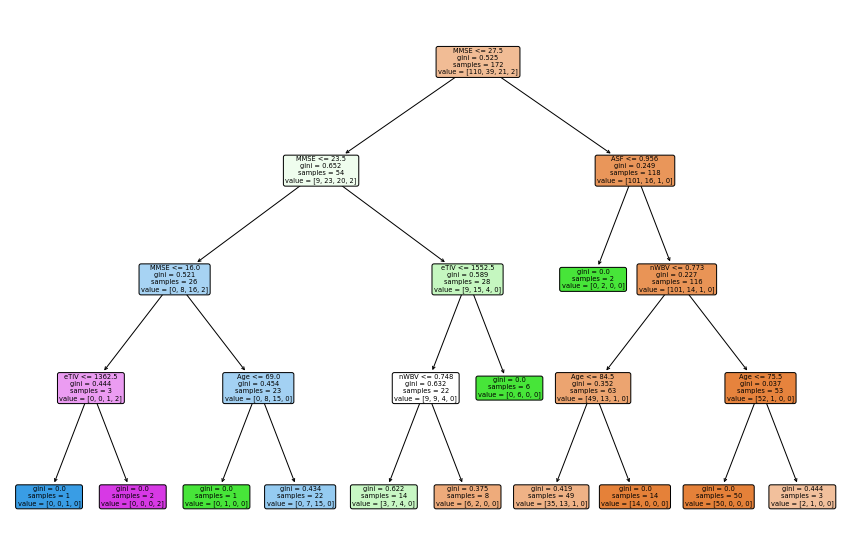

In [10]:
model = DecisionTreeClassifier(max_depth=4,random_state=42)

model.fit(X_train,y_train)

eval(X_test,y_test,model)
plot_tree(model,features)

## Max-depth = 1

Acc: 0.474
MSE: 0.500
Classified 43.182% as sick, where the in the true data 47.727% where sick.


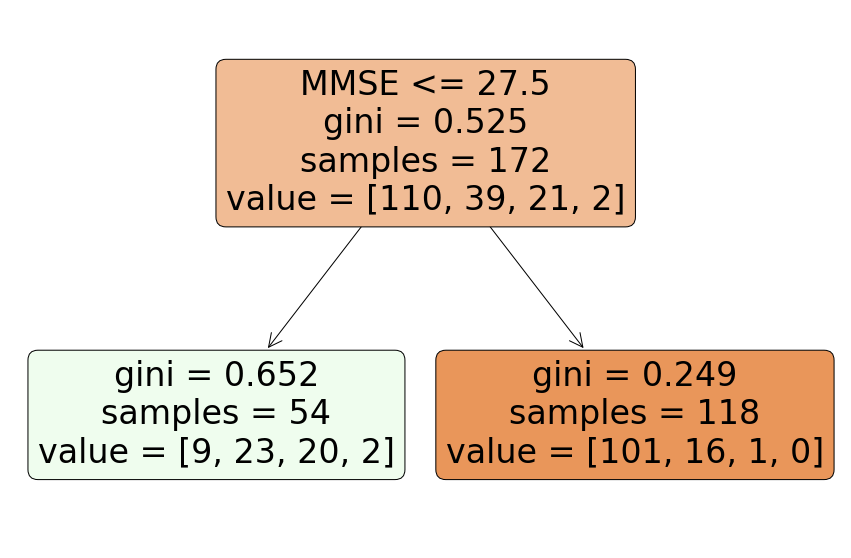

In [11]:
model = DecisionTreeClassifier(max_depth=1,random_state=42)

model.fit(X_train,y_train)

eval(X_test,y_test,model)
plot_tree(model,features)

The value refers the CDR column of values [0,0.5,1,2] where 0 means healthy.
The results seems to be better according to the evaluation function, but if we look at the leaves, we see that most of the subjects are not sick so 'Not Sick' is the safest geuss.

![smbc.png](smbc.png)

## Min samples leaf = 5

Acc: 0.425
MSE: 0.522
Classified 38.636% as sick, where the in the true data 47.727% where sick.


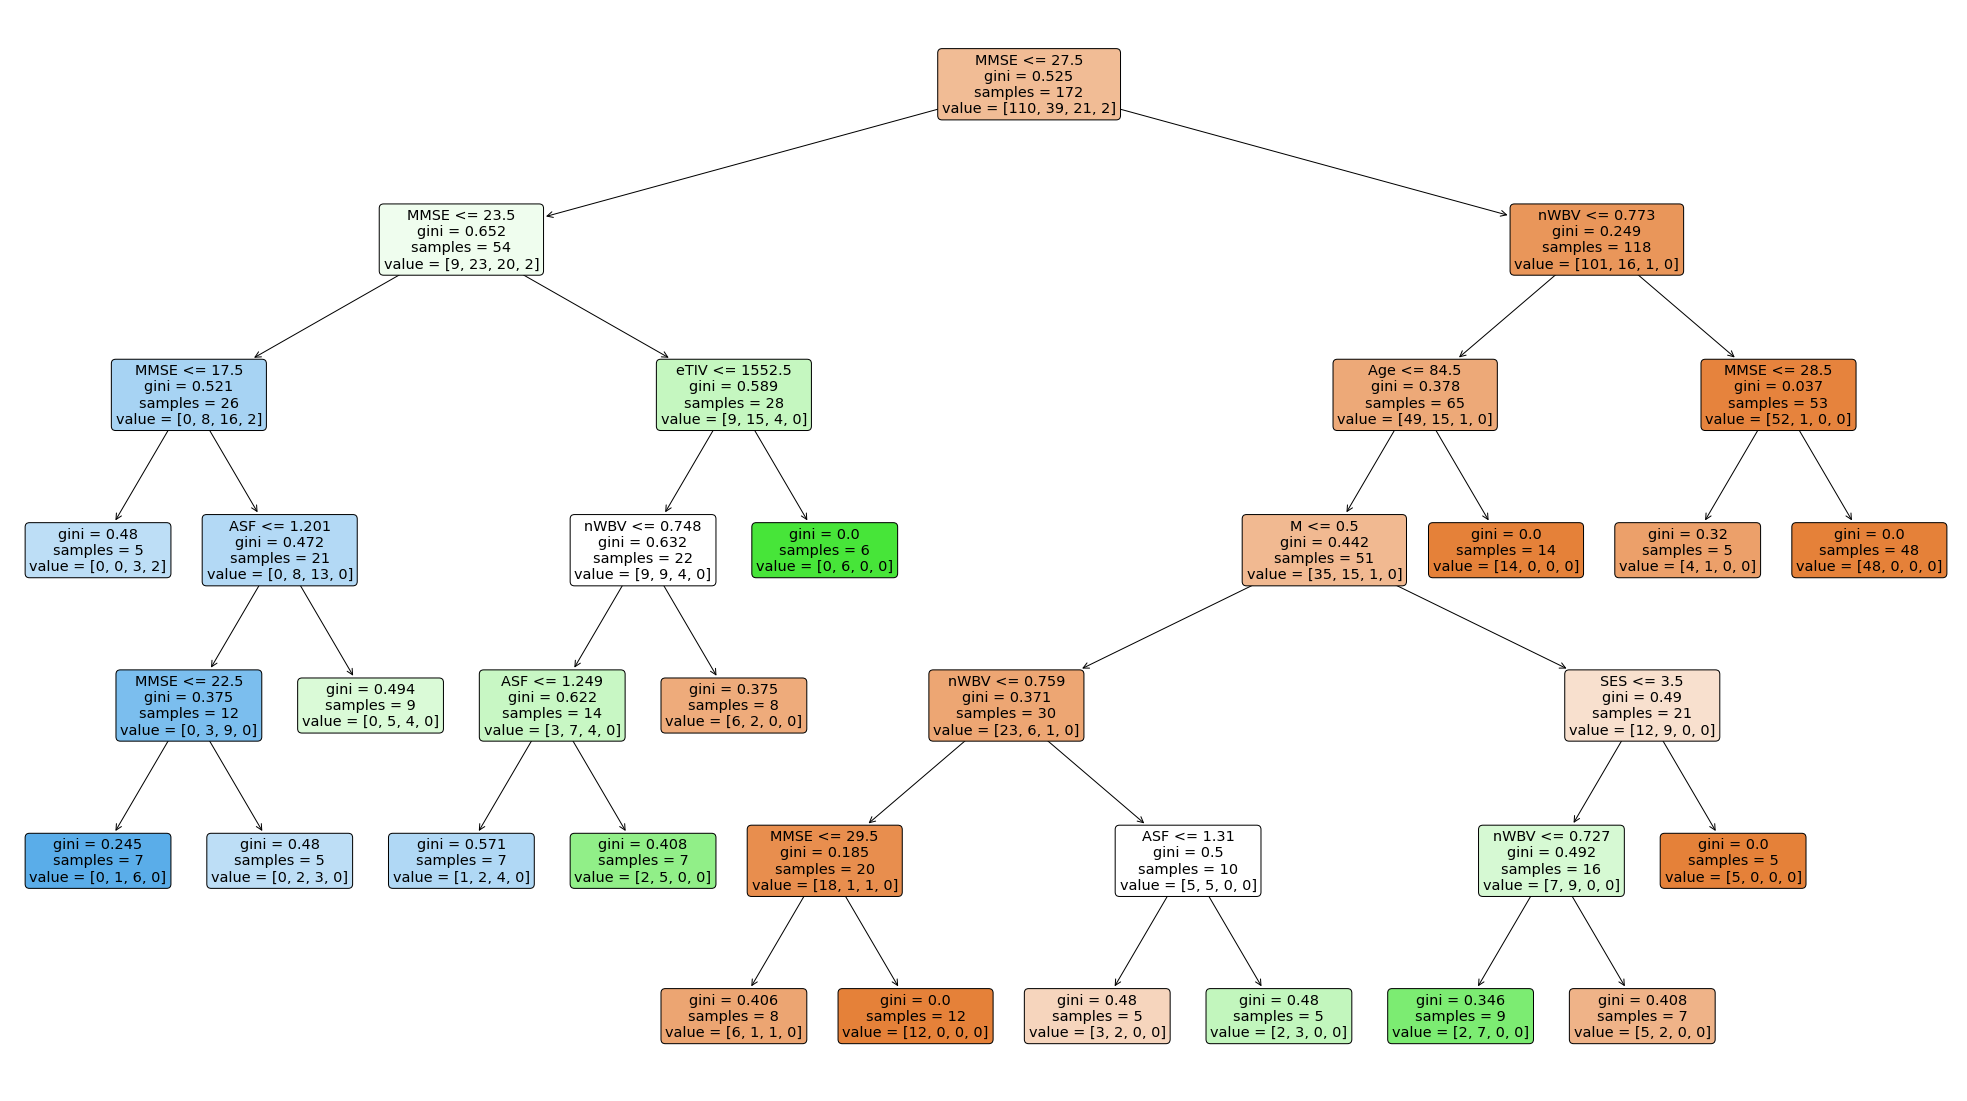

In [12]:
model = DecisionTreeClassifier(min_samples_leaf=5,random_state=42)

model.fit(X_train,y_train)

eval(X_test,y_test,model)

plot_tree(model,features,(35,20))

## Min samples split = 5

Acc: 0.430
MSE: 0.603
Classified 40.909% as sick, where the in the true data 47.727% where sick.


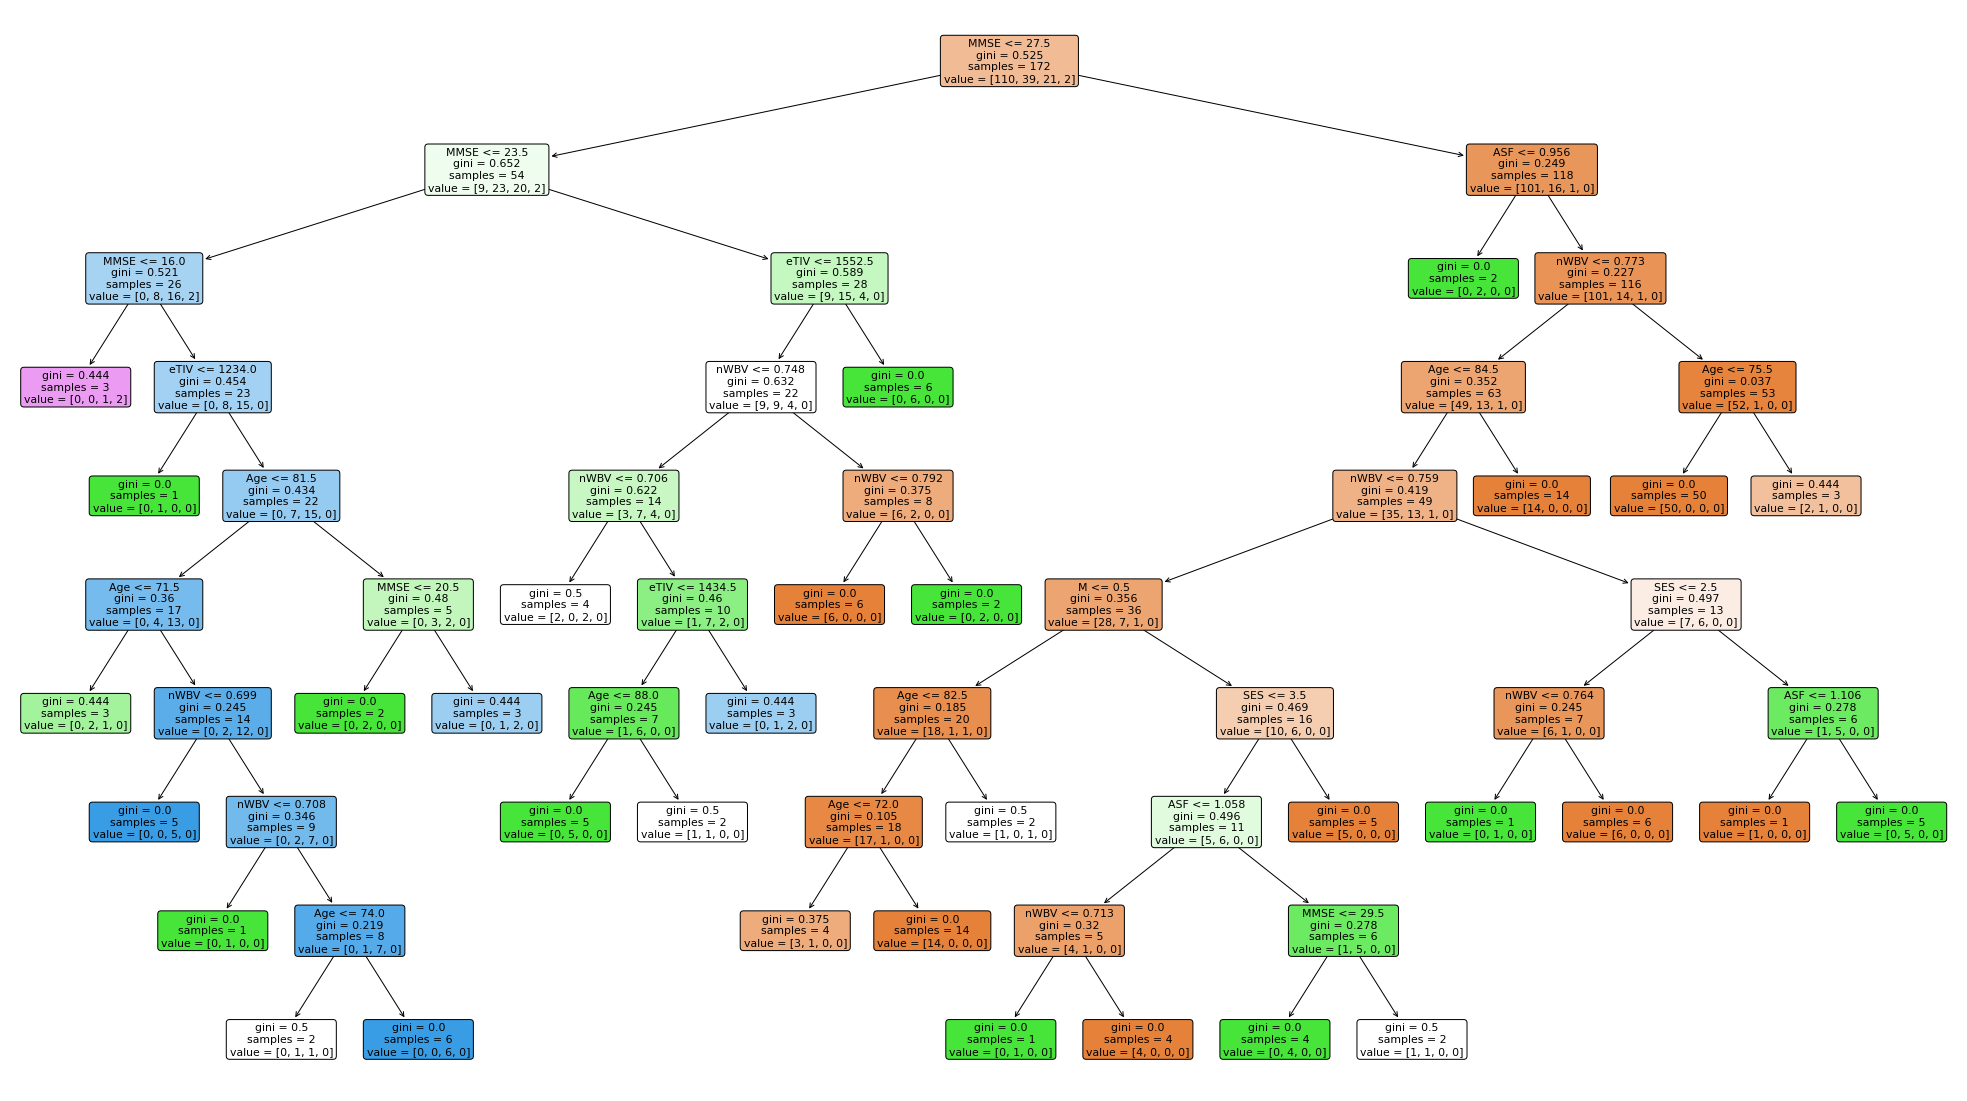

In [13]:
model = DecisionTreeClassifier(min_samples_split=5,random_state=42)

model.fit(X_train,y_train)

eval(X_test,y_test,model)

plot_tree(model,features,(35,20))